# Practica 2

Sánchez Molina Bárbara Jackelin

Modulo1 Ciencia de Datos

# Parte 1

In [1]:
import pandas as pd
import numpy as np 
import random
from sklearn.model_selection import train_test_split
import re
from unidecode import unidecode
import unicodedata
import warnings
warnings.filterwarnings("ignore")
from emoji.unicode_codes import UNICODE_EMOJI
import emoji
import missingno as msno

In [2]:

def clean_text(text, pattern="[^a-zA-Z0-9 ]"):
    cleaned_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    cleaned_text = re.sub(pattern, " ", cleaned_text.decode("utf-8"), flags=re.UNICODE)
    cleaned_text = u' '.join(cleaned_text.lower().strip().split())
    return cleaned_text

### importar texto

In [3]:
df = pd.read_csv('/home/barbara/envs/diplomado-modulo1/practica2/whatsApp.txt',
                 sep = ',-:',
                 header = None,
                 engine = 'python')
df.sample(4)



,0
213,16/5/2022 20:41 - Barbs: te mande la 4 pero no...
270,17/5/2022 16:29 - Barbs: ya es un formato segu...
67,7/5/2022 12:15 - Barbs: En mi caso no hubo alg...
68,7/5/2022 12:17 - Barbs: Apoco preguntan tanto?


In [4]:
aux1 = df[0].str.split(' ', n = 1, expand = True).copy()
df['t_fecha'] = aux1[0]

aux2 = aux1[1].str.split('-',n = 1, expand = True).copy()
df['v_hora'] = aux2[0]

aux3 = aux2[1].str.split(':',n = 1, expand = True).copy()
df['v_usuario'] = aux3[0]

df['t_texto'] = aux3[1]

df = df.iloc[:,1:].copy()

In [5]:
df.head()

,t_fecha,v_hora,v_usuario,t_texto
0,5/5/2022,20:56,Barbs,🥳🥳🥳felicidades
1,5/5/2022,20:58,Moi,Muchas muchas gracias
2,5/5/2022,20:58,Moi,🥳🥳🥳
3,5/5/2022,20:58,Moi,Al menos una noticia buena en medio de tantas...
4,5/5/2022,21:06,Barbs,Tantas malas???


In [6]:
#para pasar la hora sin minutos como los ejemplos de la practica
aux5 = df['v_hora'].str.split(':',n = 1, expand = True).copy()
df['v_hora'] = aux5[0]


In [7]:
df.sample(7)

,t_fecha,v_hora,v_usuario,t_texto
243,17/5/2022,16,Barbs,Pero si te liberan tu ss?
36,7/5/2022,10,Moi,Jaja ya se
5,5/5/2022,21,Moi,Pues tengo MUCHA tarea
70,7/5/2022,12,Moi,Están bien mensos
111,10/5/2022,19,Barbs,Gracias
35,7/5/2022,10,Barbs,Jajaja Zai estuvo en la graduacion mia y en l...
198,16/5/2022,20,Barbs,<Multimedia omitido>


### conteo de missings 

<AxesSubplot:>

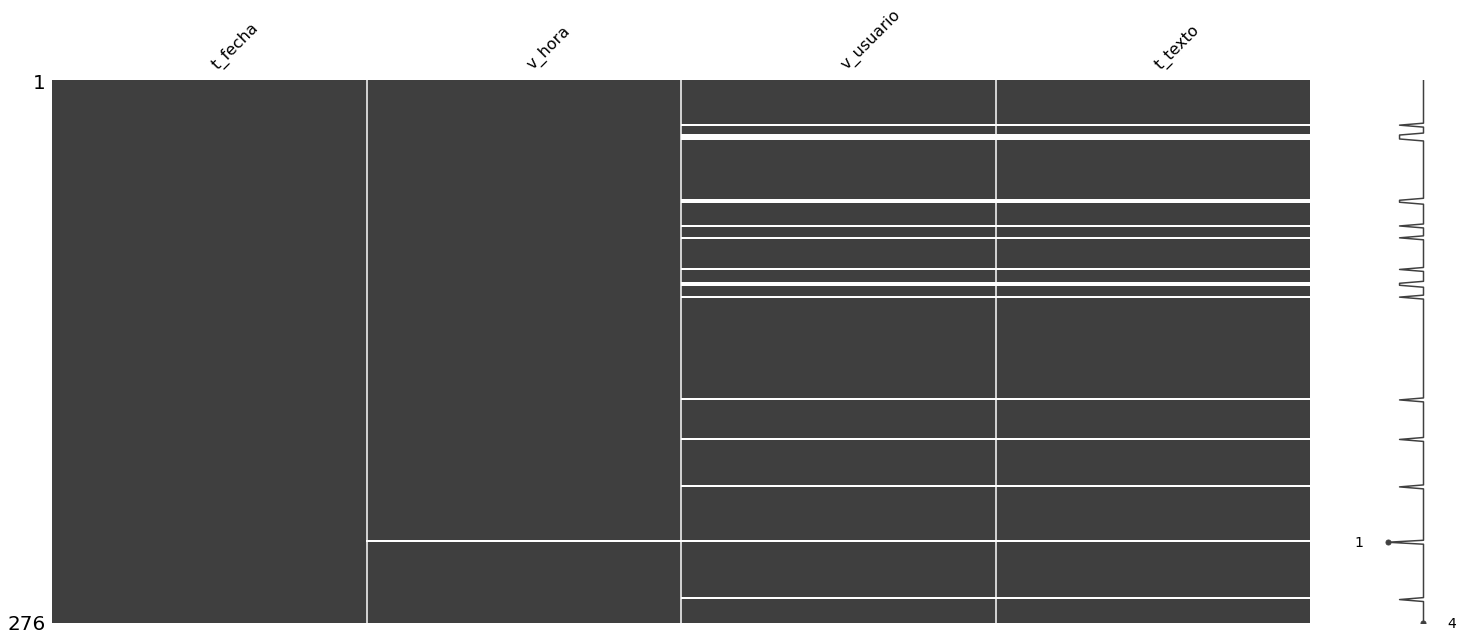

In [8]:
msno.matrix(df)

In [9]:
missings=pd.DataFrame(df.isnull().sum())

In [10]:
missings.reset_index(inplace=True)

missings=missings.rename(columns={"index":"nombre_columna",0:"total_missings"})

In [11]:
missings

,nombre_columna,total_missings
0,t_fecha,0
1,v_hora,1
2,v_usuario,17
3,t_texto,17


In [12]:
df.shape

(276, 4)

In [13]:
#En caso de tener ”missings” eliminar los registros de tu DataFrame


In [14]:
df = df.dropna()

In [15]:
df.shape

(259, 4)

In [16]:
missings

,nombre_columna,total_missings
0,t_fecha,0
1,v_hora,1
2,v_usuario,17
3,t_texto,17


In [17]:
missings2=pd.DataFrame(df.isnull().sum())

In [18]:
missings2.reset_index(inplace=True)

missings2=missings2.rename(columns={"index":"nombre_columna",0:"total_missings"})

In [19]:
missings2

,nombre_columna,total_missings
0,t_fecha,0
1,v_hora,0
2,v_usuario,0
3,t_texto,0


### conteo de multimedia omitido

In [20]:
# sacar el multimedia omitida
total_multimedia=df['t_texto'].str.contains("Multimedia omitido").value_counts()[True]

In [21]:
total_multimedia

20

In [22]:
df.shape

(259, 4)

In [23]:
df.drop(df.loc[df['t_texto'].str.contains("Multimedia omitido")].index, inplace=True)

In [24]:
df.shape

(239, 4)

In [25]:
df.sample(10)

,t_fecha,v_hora,v_usuario,t_texto
151,16/5/2022,20,Moi,Amiz
270,17/5/2022,16,Barbs,ya es un formato segun yo
255,17/5/2022,16,Barbs,Yo tengo una paliza con 1 y el desempleo
199,16/5/2022,20,Moi,Muchas gracias
15,5/5/2022,21,Moi,Masomenos
68,7/5/2022,12,Barbs,Apoco preguntan tanto?
251,17/5/2022,16,Moi,pero :c no puedo
47,7/5/2022,11,Moi,Te entiendo
202,16/5/2022,20,Moi,es esta amix
207,16/5/2022,20,Moi,ajam


### Calida de datos 

In [26]:
df["t_fecha"].value_counts(1)

16/5/2022    0.259414
7/5/2022     0.192469
17/5/2022    0.167364
13/5/2022    0.150628
5/5/2022     0.112971
10/5/2022    0.096234
6/5/2022     0.016736
15/5/2022    0.004184
Name: t_fecha, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 275
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   t_fecha    239 non-null    object
 1   v_hora     239 non-null    object
 2   v_usuario  239 non-null    object
 3   t_texto    239 non-null    object
dtypes: object(4)
memory usage: 9.3+ KB


<AxesSubplot:>

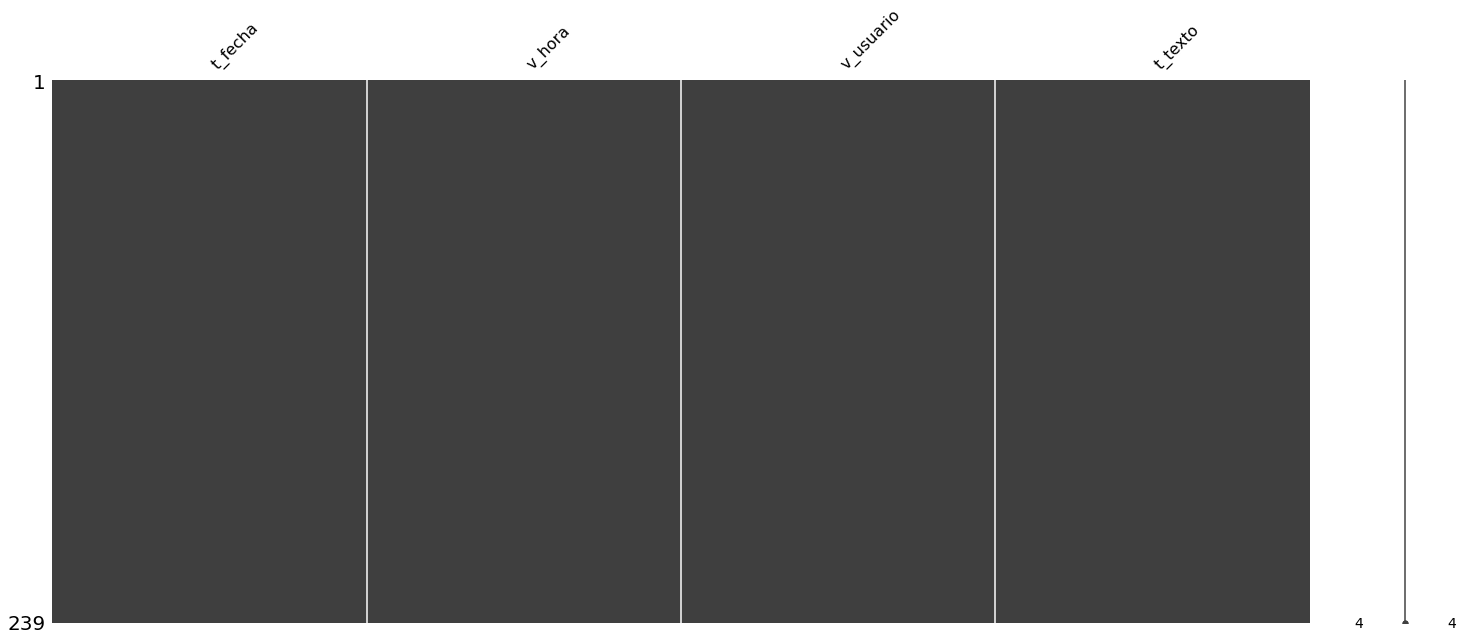

In [28]:
msno.matrix(df)
# ya no hay nulos

In [29]:
df["t_texto"].value_counts(1)

 Jaja                             0.012552
 uwu                              0.012552
 Si                               0.012552
 Chale                            0.008368
 Jajaja                           0.008368
                                    ...   
 Bien                             0.004184
 Y tu ?                           0.004184
 No definir bien las variables    0.004184
 No es de linux                   0.004184
 vavava gracias                   0.004184
Name: t_texto, Length: 223, dtype: float64

In [30]:
#eliminamos duplicados
df.duplicated().sum()

2

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.shape

(237, 4)

In [33]:
df["v_hora"]=df["v_hora"].map(int) 

In [34]:
df["v_hora"].describe(percentiles=np.arange(0.1,1.1,.1))

count    237.000000
mean      17.493671
std        4.194044
min        0.000000
10%       11.000000
20%       12.000000
30%       16.000000
40%       16.400000
50%       20.000000
60%       20.000000
70%       20.000000
80%       21.000000
90%       21.000000
100%      23.000000
max       23.000000
Name: v_hora, dtype: float64

In [35]:
df[df["v_hora"]>24].shape[0]/df.shape[0]

0.0

### (d) Realiza la limpieza de la variable ”v usuario”

In [36]:
df['v_usuario'].value_counts()
#solo tenemos dos usuarios

 Barbs    119
 Moi      118
Name: v_usuario, dtype: int64

In [37]:
df["v_usuario"]=df["v_usuario"].map(lambda x:clean_text(x, pattern="[^a-zA-Z ]"))

In [38]:
df["v_usuario"]

0      barbs
1        moi
2        moi
3        moi
4      barbs
       ...  
270    barbs
271    barbs
273    barbs
274      moi
275    barbs
Name: v_usuario, Length: 237, dtype: object

### (e)Realiza la limpieza de la variable ”t texto”

In [39]:
#se limpiara la variable texto pero en este caso la hare otra columna para no perder la original

In [40]:
df["t_texto1"]=df["t_texto"].map(lambda x: emoji.demojize(x , language='es'))

In [41]:
df['t_texto1']=df['t_texto1'].astype(str)

In [42]:
df['t_texto1'] = df['t_texto1'].map(clean_text)
df['t_texto1'].value_counts(1).head(13)

si                       0.016878
uwu                      0.016878
                         0.012658
jaja                     0.012658
muchas gracias           0.012658
gracias                  0.012658
de nada                  0.008439
cara llorando fuerte     0.008439
xdd                      0.008439
no ma                    0.008439
ojos                     0.008439
muchas muchas gracias    0.008439
chale                    0.008439
Name: t_texto1, dtype: float64

In [43]:
# convertimos los jaja
ayuda= []
for x in df['t_texto1']:
    if (x.startswith('ja') | x.startswith('aj') | x.startswith('jj') |  x.startswith('kaja') |
        x.startswith('aa')) & (x.endswith('ja') | x.endswith('aj') | x.endswith('jj') | x.endswith('kaja') | x.endswith('aa')):
        ayuda.append('jaja')
    else:
        ayuda.append(x)
df['t_texto1'] = ayuda


In [44]:
df.head()

,t_fecha,v_hora,v_usuario,t_texto,t_texto1
0,5/5/2022,20,barbs,🥳🥳🥳felicidades,cara de fiesta cara de fiesta cara de fiesta f...
1,5/5/2022,20,moi,Muchas muchas gracias,muchas muchas gracias
2,5/5/2022,20,moi,🥳🥳🥳,cara de fiesta cara de fiesta cara de fiesta
3,5/5/2022,20,moi,Al menos una noticia buena en medio de tantas...,al menos una noticia buena en medio de tantas ...
4,5/5/2022,21,barbs,Tantas malas???,tantas malas


In [45]:
import jellyfish as jf

In [46]:
mensajes=pd.DataFrame(df["t_texto1"].value_counts()).reset_index()

mensajes.columns=["mensaje","#"]
mensajes=mensajes[["mensaje"]]

In [47]:
mensajes=list(df["t_texto1"].value_counts().index)

In [48]:
def diff_nombres(texto,mensajes):
    mensajes=list(filter(lambda x:x!=texto,mensajes))
    diff=[jf.levenshtein_distance(x,str(texto)) for x in mensajes]
  
    if len(diff)>0:
        similitud=mensajes[diff.index(min(diff))]

    else:
        similitud=""
    return [similitud,min(diff)]


In [49]:
df["t_texto1_ayuda"]=df["t_texto1"].map(lambda x:diff_nombres(x,mensajes))

In [50]:
df["t_texto1_ayuda"].map(lambda x:x[1]).value_counts()

1     25
3     22
2     18
5     14
12    14
13    12
11    11
8     10
6     10
14     9
10     9
9      9
4      9
7      7
21     5
22     5
17     4
16     4
19     4
36     3
23     3
24     3
15     3
27     2
29     2
20     2
30     2
40     2
35     2
25     2
37     1
18     1
85     1
44     1
45     1
53     1
31     1
43     1
32     1
26     1
Name: t_texto1_ayuda, dtype: int64

In [51]:
df[df["t_texto1_ayuda"].map(lambda x:x[1]<5)]["t_texto1"].value_counts()

jaja               7
uwu                4
si                 4
                   3
gracias            3
no ma              2
chale              2
xdd                2
ojos               2
de nada            2
va                 1
grac               1
sino ntp           1
oscar              1
nani               1
7u7                1
u u                1
oh no              1
no                 1
ajam               1
digo no            1
amiz               1
grax               1
denada             1
neta               1
jajaja ta bueno    1
jacobo             1
chi                1
oye amix           1
fue ese            1
mande              1
aaah               1
sorry              1
u                  1
y esto por         1
oh                 1
jaja ya se         1
xd                 1
jajaja si          1
changos f          1
v                  1
igusl              1
bien               1
sip                1
y tu               1
changos            1
si amix            1
porque       

In [52]:
df[df["t_texto1_ayuda"].map(lambda x:x[1]<5)]["t_texto1_ayuda"].map(lambda x:x[0]).value_counts()

ajam               10
si                  8
jaja                5
u u                 5
v                   4
sip                 4
grac                4
xd                  3
chi                 2
denada              2
                    2
neta                2
si amix             1
grax                1
digo no             1
oh                  1
es ese              1
oh no               1
uwu                 1
de nada             1
jajaja ah bueno     1
u                   1
bien                1
nani                1
y esto por          1
jajaja ta bueno     1
sorry               1
oye amix            1
changos f           1
changos             1
jaja ya se          1
xdd                 1
jajaja si           1
pero por            1
fue ese             1
Name: t_texto1_ayuda, dtype: int64

In [53]:
dictio_nombres=dict(zip([
       'zd',
       'xdd',
       'jajaja si','changos f',
       'amiz',
       'jajaja ah bueno',
       'aaah'],['xd','xd',
       'jaja si','changos',
       'amix',
       'jaja ah bueno',
       'ah']))

In [54]:
df["t_texto1"]=df["t_texto1"].replace(dictio_nombres)

In [55]:
df.sample(3)

,t_fecha,v_hora,v_usuario,t_texto,t_texto1,t_texto1_ayuda
7,5/5/2022,21,moi,Y la sentimental pues...!! Está todavia más p...,y la sentimental pues esta todavia mas popo jaja,"[la mental esta ahi subsistiendo, 30]"
233,17/5/2022,16,barbs,En tu caso si puedes aplicar a la medalla del...,en tu caso si puedes aplicar a la medalla del ...,"[para liberar tu servicio social, 36]"
125,13/5/2022,21,barbs,Pues hay que planearlo y va,pues hay que planearlo y va,"[pues se nos junto todo, 17]"


In [56]:
df=df.drop(columns=["t_texto1_ayuda"])

In [57]:
df.isnull().sum()

t_fecha      0
v_hora       0
v_usuario    0
t_texto      0
t_texto1     0
dtype: int64

### (f) Elimina stop words

In [58]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/barbara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
stop_words=nltk.corpus.stopwords.words("spanish")

In [60]:
len(stop_words)

313

In [61]:
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [62]:
text=df.iloc[0]["t_texto1"]

In [63]:
text.split(" ")

['cara',
 'de',
 'fiesta',
 'cara',
 'de',
 'fiesta',
 'cara',
 'de',
 'fiesta',
 'felicidades']

In [64]:
[x for x in text.split(" ") if x not in stop_words]

['cara', 'fiesta', 'cara', 'fiesta', 'cara', 'fiesta', 'felicidades']

In [65]:
" ".join([x for x in text.split(" ") if x not in stop_words])

'cara fiesta cara fiesta cara fiesta felicidades'

In [66]:
df["t_texto2"]=df["t_texto1"].map(lambda text:" ".join([x for x in text.split(" ") if x not in stop_words]))

In [67]:
df

,t_fecha,v_hora,v_usuario,t_texto,t_texto1,t_texto2
0,5/5/2022,20,barbs,🥳🥳🥳felicidades,cara de fiesta cara de fiesta cara de fiesta f...,cara fiesta cara fiesta cara fiesta felicidades
1,5/5/2022,20,moi,Muchas muchas gracias,muchas muchas gracias,muchas muchas gracias
2,5/5/2022,20,moi,🥳🥳🥳,cara de fiesta cara de fiesta cara de fiesta,cara fiesta cara fiesta cara fiesta
3,5/5/2022,20,moi,Al menos una noticia buena en medio de tantas...,al menos una noticia buena en medio de tantas ...,menos noticia buena medio tantas malas jaja
4,5/5/2022,21,barbs,Tantas malas???,tantas malas,tantas malas
...,...,...,...,...,...,...
270,17/5/2022,16,barbs,ya es un formato segun yo,ya es un formato segun yo,formato segun
271,17/5/2022,16,barbs,ya lo enconte,ya lo enconte,enconte
273,17/5/2022,16,barbs,es ese,es ese,
274,17/5/2022,16,moi,vavava gracias,vavava gracias,vavava gracias


In [68]:
df["t_texto2"].value_counts()

                          14
jaja                       9
xd                         5
si                         4
uwu                        4
                          ..
cara haciendo mueca        1
si bueno                   1
bien                       1
definir bien variables     1
vavava gracias             1
Name: t_texto2, Length: 193, dtype: int64

In [69]:
df["t_texto2"]=df["t_texto2"].replace('',None)

In [70]:
df=df.dropna()

In [71]:
df.shape

(223, 6)

In [72]:
df

,t_fecha,v_hora,v_usuario,t_texto,t_texto1,t_texto2
0,5/5/2022,20,barbs,🥳🥳🥳felicidades,cara de fiesta cara de fiesta cara de fiesta f...,cara fiesta cara fiesta cara fiesta felicidades
1,5/5/2022,20,moi,Muchas muchas gracias,muchas muchas gracias,muchas muchas gracias
2,5/5/2022,20,moi,🥳🥳🥳,cara de fiesta cara de fiesta cara de fiesta,cara fiesta cara fiesta cara fiesta
3,5/5/2022,20,moi,Al menos una noticia buena en medio de tantas...,al menos una noticia buena en medio de tantas ...,menos noticia buena medio tantas malas jaja
4,5/5/2022,21,barbs,Tantas malas???,tantas malas,tantas malas
...,...,...,...,...,...,...
268,17/5/2022,16,moi,ya lo ando redactando uwu,ya lo ando redactando uwu,ando redactando uwu
269,17/5/2022,16,barbs,no es que te llega,no es que te llega,llega
270,17/5/2022,16,barbs,ya es un formato segun yo,ya es un formato segun yo,formato segun
271,17/5/2022,16,barbs,ya lo enconte,ya lo enconte,enconte


### (g) Elimina hapaxes

In [73]:
corpus=" ".join(df["t_texto2"].values)

In [74]:
corpus

'cara fiesta cara fiesta cara fiesta felicidades muchas muchas gracias cara fiesta cara fiesta cara fiesta menos noticia buena medio tantas malas jaja tantas malas pues mucha tarea salud emocional popo sentimental pues todavia mas popo jaja mental ahi subsistiendo ansieda ta juerte puedo ayudarte ayudas mandas mensaje cara favor cara favor articulo si musica masomenos teoria si casi hablo musica mas bien hablo automatas celulares tomaste teoria computacion xd igual lei medio libro weas ma chille materia servido vamos casi llevaste bejos oh acuerdo nombre solo automatas costo aprender jajaja zai graduacion mia toma fotos tambien jaja xd bien tremenda jaja ando chillando diplomado jaja examen asi luego entrego retraso 1 min valio osea podia 6 materias ahora 1 nel jaja entiendo xd cara llorando fuerte jaja si echale muchas ganitas amix intento si cada modulo arriba 8 paso titulo si cierto si aplican eh cuidado ta dificil sola pues llego desesperacion changos si pues recuperacion examen pr

In [75]:
corpus.split()

['cara',
 'fiesta',
 'cara',
 'fiesta',
 'cara',
 'fiesta',
 'felicidades',
 'muchas',
 'muchas',
 'gracias',
 'cara',
 'fiesta',
 'cara',
 'fiesta',
 'cara',
 'fiesta',
 'menos',
 'noticia',
 'buena',
 'medio',
 'tantas',
 'malas',
 'jaja',
 'tantas',
 'malas',
 'pues',
 'mucha',
 'tarea',
 'salud',
 'emocional',
 'popo',
 'sentimental',
 'pues',
 'todavia',
 'mas',
 'popo',
 'jaja',
 'mental',
 'ahi',
 'subsistiendo',
 'ansieda',
 'ta',
 'juerte',
 'puedo',
 'ayudarte',
 'ayudas',
 'mandas',
 'mensaje',
 'cara',
 'favor',
 'cara',
 'favor',
 'articulo',
 'si',
 'musica',
 'masomenos',
 'teoria',
 'si',
 'casi',
 'hablo',
 'musica',
 'mas',
 'bien',
 'hablo',
 'automatas',
 'celulares',
 'tomaste',
 'teoria',
 'computacion',
 'xd',
 'igual',
 'lei',
 'medio',
 'libro',
 'weas',
 'ma',
 'chille',
 'materia',
 'servido',
 'vamos',
 'casi',
 'llevaste',
 'bejos',
 'oh',
 'acuerdo',
 'nombre',
 'solo',
 'automatas',
 'costo',
 'aprender',
 'jajaja',
 'zai',
 'graduacion',
 'mia',
 'toma',

In [76]:
df['t_texto2'].value_counts(1)

jaja                      0.040359
xd                        0.022422
si                        0.017937
uwu                       0.017937
muchas gracias            0.013453
                            ...   
cara haciendo mueca       0.004484
si bueno                  0.004484
bien                      0.004484
definir bien variables    0.004484
vavava gracias            0.004484
Name: t_texto2, Length: 192, dtype: float64

In [77]:
fdist=nltk.FreqDist(corpus.split())

In [78]:
fdist

FreqDist({'si': 24, 'cara': 19, 'jaja': 17, 'gracias': 11, 'muchas': 9, 'bien': 8, 'amix': 8, 'pues': 7, 'u': 7, 'fiesta': 6, ...})

In [79]:
pd.DataFrame(fdist.items()).sort_values(by=[1])

,0,1
149,proba,1
175,denuevo,1
178,canon,1
180,depre,1
182,despues,1
...,...,...
3,muchas,9
4,gracias,11
11,jaja,17
0,cara,19


In [80]:
list_hapaxes=fdist.hapaxes()

In [81]:
len

<function len(obj, /)>

In [82]:
len(list_hapaxes)

208

In [83]:
list_hapaxes

['felicidades',
 'noticia',
 'buena',
 'mucha',
 'tarea',
 'salud',
 'emocional',
 'sentimental',
 'todavia',
 'mental',
 'ahi',
 'subsistiendo',
 'ansieda',
 'juerte',
 'ayudarte',
 'ayudas',
 'mandas',
 'mensaje',
 'articulo',
 'masomenos',
 'celulares',
 'tomaste',
 'computacion',
 'lei',
 'libro',
 'weas',
 'chille',
 'servido',
 'vamos',
 'bejos',
 'acuerdo',
 'nombre',
 'costo',
 'aprender',
 'zai',
 'toma',
 'fotos',
 'tremenda',
 'chillando',
 'luego',
 'entrego',
 'retraso',
 'min',
 'valio',
 'osea',
 'podia',
 'ahora',
 'nel',
 'entiendo',
 'echale',
 'ganitas',
 'intento',
 'cada',
 'modulo',
 'arriba',
 '8',
 'paso',
 'aplican',
 'cuidado',
 'dificil',
 'sola',
 'llego',
 'desesperacion',
 'recuperacion',
 'presiones',
 'mejor',
 'enfocate',
 'pasar',
 'examenes',
 'apoco',
 'preguntan',
 'mensos',
 'mapa',
 'perder',
 'v',
 'empresa',
 'llama',
 'excellence',
 'graduaciones',
 'igusl',
 'aparte',
 'profe',
 'amor',
 'haciendo',
 'mueca',
 'definir',
 'variables',
 'linux'

In [84]:
len(corpus.split(" "))

535

In [85]:
len(list_hapaxes)

208

In [86]:
df.shape

(223, 6)

In [87]:
df

,t_fecha,v_hora,v_usuario,t_texto,t_texto1,t_texto2
0,5/5/2022,20,barbs,🥳🥳🥳felicidades,cara de fiesta cara de fiesta cara de fiesta f...,cara fiesta cara fiesta cara fiesta felicidades
1,5/5/2022,20,moi,Muchas muchas gracias,muchas muchas gracias,muchas muchas gracias
2,5/5/2022,20,moi,🥳🥳🥳,cara de fiesta cara de fiesta cara de fiesta,cara fiesta cara fiesta cara fiesta
3,5/5/2022,20,moi,Al menos una noticia buena en medio de tantas...,al menos una noticia buena en medio de tantas ...,menos noticia buena medio tantas malas jaja
4,5/5/2022,21,barbs,Tantas malas???,tantas malas,tantas malas
...,...,...,...,...,...,...
268,17/5/2022,16,moi,ya lo ando redactando uwu,ya lo ando redactando uwu,ando redactando uwu
269,17/5/2022,16,barbs,no es que te llega,no es que te llega,llega
270,17/5/2022,16,barbs,ya es un formato segun yo,ya es un formato segun yo,formato segun
271,17/5/2022,16,barbs,ya lo enconte,ya lo enconte,enconte


In [88]:
df['t_texto2'].value_counts(1)

jaja                      0.040359
xd                        0.022422
si                        0.017937
uwu                       0.017937
muchas gracias            0.013453
                            ...   
cara haciendo mueca       0.004484
si bueno                  0.004484
bien                      0.004484
definir bien variables    0.004484
vavava gracias            0.004484
Name: t_texto2, Length: 192, dtype: float64

### Realiza tokenización

In [89]:
df

,t_fecha,v_hora,v_usuario,t_texto,t_texto1,t_texto2
0,5/5/2022,20,barbs,🥳🥳🥳felicidades,cara de fiesta cara de fiesta cara de fiesta f...,cara fiesta cara fiesta cara fiesta felicidades
1,5/5/2022,20,moi,Muchas muchas gracias,muchas muchas gracias,muchas muchas gracias
2,5/5/2022,20,moi,🥳🥳🥳,cara de fiesta cara de fiesta cara de fiesta,cara fiesta cara fiesta cara fiesta
3,5/5/2022,20,moi,Al menos una noticia buena en medio de tantas...,al menos una noticia buena en medio de tantas ...,menos noticia buena medio tantas malas jaja
4,5/5/2022,21,barbs,Tantas malas???,tantas malas,tantas malas
...,...,...,...,...,...,...
268,17/5/2022,16,moi,ya lo ando redactando uwu,ya lo ando redactando uwu,ando redactando uwu
269,17/5/2022,16,barbs,no es que te llega,no es que te llega,llega
270,17/5/2022,16,barbs,ya es un formato segun yo,ya es un formato segun yo,formato segun
271,17/5/2022,16,barbs,ya lo enconte,ya lo enconte,enconte


In [90]:
df["t_texto2"]=df["t_texto2"].map(lambda x:x.split())

In [91]:
df

,t_fecha,v_hora,v_usuario,t_texto,t_texto1,t_texto2
0,5/5/2022,20,barbs,🥳🥳🥳felicidades,cara de fiesta cara de fiesta cara de fiesta f...,"[cara, fiesta, cara, fiesta, cara, fiesta, fel..."
1,5/5/2022,20,moi,Muchas muchas gracias,muchas muchas gracias,"[muchas, muchas, gracias]"
2,5/5/2022,20,moi,🥳🥳🥳,cara de fiesta cara de fiesta cara de fiesta,"[cara, fiesta, cara, fiesta, cara, fiesta]"
3,5/5/2022,20,moi,Al menos una noticia buena en medio de tantas...,al menos una noticia buena en medio de tantas ...,"[menos, noticia, buena, medio, tantas, malas, ..."
4,5/5/2022,21,barbs,Tantas malas???,tantas malas,"[tantas, malas]"
...,...,...,...,...,...,...
268,17/5/2022,16,moi,ya lo ando redactando uwu,ya lo ando redactando uwu,"[ando, redactando, uwu]"
269,17/5/2022,16,barbs,no es que te llega,no es que te llega,[llega]
270,17/5/2022,16,barbs,ya es un formato segun yo,ya es un formato segun yo,"[formato, segun]"
271,17/5/2022,16,barbs,ya lo enconte,ya lo enconte,[enconte]


### (i) Realiza derivación (Stemmer)

In [92]:
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import SnowballStemmer

In [93]:
text=df["t_texto2"]

In [94]:
spanish_stemmer = SnowballStemmer('spanish')

In [95]:
df["t_textodev"]=df["t_texto2"].map(lambda text:[spanish_stemmer.stem(word) for word in text])
#lo use con el texto limpio debido a que considero que con hapex se pierden valores

In [96]:
df.sample(6)

,t_fecha,v_hora,v_usuario,t_texto,t_texto1,t_texto2,t_textodev
227,16/5/2022,20,moi,grax,grax,[grax],[grax]
73,7/5/2022,12,barbs,Si es asi,si es asi,"[si, asi]","[si, asi]"
76,7/5/2022,12,barbs,:v,v,[v],[v]
58,7/5/2022,11,barbs,Y pues ya me llego la desesperacion,y pues ya me llego la desesperacion,"[pues, llego, desesperacion]","[pues, lleg, desesperacion]"
135,13/5/2022,22,moi,Jaja cuando todo baje denuevo me woa awuitar ...,jaja cuando todo baje denuevo me woa awuitar b...,"[jaja, baje, denuevo, woa, awuitar, bien, canon]","[jaj, baj, denuev, woa, awuit, bien, canon]"
41,7/5/2022,11,moi,Porque?? Jaja,porque jaja,[jaja],[jaj]


### j) Creación de variables

In [97]:
df['c_numero_palabras'] = df["t_texto2"].apply(lambda x: len(x))

In [98]:
df['c_numero_letras'] =df["t_texto2"].map(lambda x: sum(len(word) for word in x))

In [99]:
df['c_longitud_palabras'] = df['c_numero_letras'] / df['c_numero_palabras']

In [100]:
df

,t_fecha,v_hora,v_usuario,t_texto,t_texto1,t_texto2,t_textodev,c_numero_palabras,c_numero_letras,c_longitud_palabras
0,5/5/2022,20,barbs,🥳🥳🥳felicidades,cara de fiesta cara de fiesta cara de fiesta f...,"[cara, fiesta, cara, fiesta, cara, fiesta, fel...","[car, fiest, car, fiest, car, fiest, felic]",7,41,5.857143
1,5/5/2022,20,moi,Muchas muchas gracias,muchas muchas gracias,"[muchas, muchas, gracias]","[much, much, graci]",3,19,6.333333
2,5/5/2022,20,moi,🥳🥳🥳,cara de fiesta cara de fiesta cara de fiesta,"[cara, fiesta, cara, fiesta, cara, fiesta]","[car, fiest, car, fiest, car, fiest]",6,30,5.000000
3,5/5/2022,20,moi,Al menos una noticia buena en medio de tantas...,al menos una noticia buena en medio de tantas ...,"[menos, noticia, buena, medio, tantas, malas, ...","[men, notici, buen, medi, tant, mal, jaj]",7,37,5.285714
4,5/5/2022,21,barbs,Tantas malas???,tantas malas,"[tantas, malas]","[tant, mal]",2,11,5.500000
...,...,...,...,...,...,...,...,...,...,...
268,17/5/2022,16,moi,ya lo ando redactando uwu,ya lo ando redactando uwu,"[ando, redactando, uwu]","[ando, redact, uwu]",3,17,5.666667
269,17/5/2022,16,barbs,no es que te llega,no es que te llega,[llega],[lleg],1,5,5.000000
270,17/5/2022,16,barbs,ya es un formato segun yo,ya es un formato segun yo,"[formato, segun]","[format, segun]",2,12,6.000000
271,17/5/2022,16,barbs,ya lo enconte,ya lo enconte,[enconte],[encont],1,7,7.000000


In [101]:
# reconocimiento de entidad

In [102]:
import spacy
from collections import Counter

In [103]:
df["t_texto2"]=df["t_texto2"].map(lambda x:" ".join(x))

In [104]:
ner = spacy.load('en_core_web_sm')

txt = df["t_texto1"].iloc[0]

In [105]:
text=df["t_texto2"].iloc[0]

In [106]:
txt

'cara de fiesta cara de fiesta cara de fiesta felicidades'

In [107]:
text

'cara fiesta cara fiesta cara fiesta felicidades'

In [108]:
doc = ner(txt)

In [109]:
spacy.displacy.render(doc, style="ent")

In [110]:
doc2 = ner(text)


In [111]:

spacy.displacy.render(doc2, style="ent")

In [112]:
for token in doc.ents:
    print(token)
    print(token.label_)

cara de fiesta cara de fiesta cara de fiesta
PERSON


In [113]:
aux=df[:10]

In [114]:
aux["docs_ner"]=aux["t_texto1"].map(lambda x:ner(x))

In [115]:
from collections import Counter

In [116]:
aux["ner"]=aux["docs_ner"].map(lambda x:[y for y in x.ents])

In [117]:
aux["ner"]

0    [(cara, de, fiesta, cara, de, fiesta, cara, de...
1                                                   []
2    [(cara, de, fiesta, cara, de, fiesta, cara, de...
3                      [(al, menos), (noticia, buena)]
4                                    [(tantas, malas)]
5                                            [(tengo)]
6                                           [(de, la)]
7                                                   []
8                                       [(la, mental)]
9                       [(y, la, ansieda, ta, juerte)]
Name: ner, dtype: object

In [118]:
aux["aux"]=aux["docs_ner"].map(lambda x:Counter([y.label_ for y in x.ents]))

In [119]:
aux

,t_fecha,v_hora,v_usuario,t_texto,t_texto1,t_texto2,t_textodev,c_numero_palabras,c_numero_letras,c_longitud_palabras,docs_ner,ner,aux
0,5/5/2022,20,barbs,🥳🥳🥳felicidades,cara de fiesta cara de fiesta cara de fiesta f...,cara fiesta cara fiesta cara fiesta felicidades,"[car, fiest, car, fiest, car, fiest, felic]",7,41,5.857143,"(cara, de, fiesta, cara, de, fiesta, cara, de,...","[(cara, de, fiesta, cara, de, fiesta, cara, de...",{'PERSON': 1}
1,5/5/2022,20,moi,Muchas muchas gracias,muchas muchas gracias,muchas muchas gracias,"[much, much, graci]",3,19,6.333333,"(muchas, muchas, gracias)",[],{}
2,5/5/2022,20,moi,🥳🥳🥳,cara de fiesta cara de fiesta cara de fiesta,cara fiesta cara fiesta cara fiesta,"[car, fiest, car, fiest, car, fiest]",6,30,5.000000,"(cara, de, fiesta, cara, de, fiesta, cara, de,...","[(cara, de, fiesta, cara, de, fiesta, cara, de...",{'PERSON': 1}
3,5/5/2022,20,moi,Al menos una noticia buena en medio de tantas...,al menos una noticia buena en medio de tantas ...,menos noticia buena medio tantas malas jaja,"[men, notici, buen, medi, tant, mal, jaj]",7,37,5.285714,"(al, menos, una, noticia, buena, en, medio, de...","[(al, menos), (noticia, buena)]",{'PERSON': 2}
4,5/5/2022,21,barbs,Tantas malas???,tantas malas,tantas malas,"[tant, mal]",2,11,5.500000,"(tantas, malas)","[(tantas, malas)]",{'PERSON': 1}
5,5/5/2022,21,moi,Pues tengo MUCHA tarea,pues tengo mucha tarea,pues mucha tarea,"[pues, much, tare]",3,14,4.666667,"(pues, tengo, mucha, tarea)",[(tengo)],{'NORP': 1}
6,5/5/2022,21,moi,Mi salud emocional está por de la popo,mi salud emocional esta por de la popo,salud emocional popo,"[salud, emocional, pop]",3,18,6.000000,"(mi, salud, emocional, esta, por, de, la, popo)","[(de, la)]",{'LOC': 1}
7,5/5/2022,21,moi,Y la sentimental pues...!! Está todavia más p...,y la sentimental pues esta todavia mas popo jaja,sentimental pues todavia mas popo jaja,"[sentimental, pues, todavi, mas, pop, jaj]",6,33,5.500000,"(y, la, sentimental, pues, esta, todavia, mas,...",[],{}
8,5/5/2022,21,moi,"La mental está ahí, subsistiendo",la mental esta ahi subsistiendo,mental ahi subsistiendo,"[mental, ahi, subsist]",3,21,7.000000,"(la, mental, esta, ahi, subsistiendo)","[(la, mental)]",{'ORG': 1}
9,5/5/2022,21,moi,Y la ansieda ta juerte,y la ansieda ta juerte,ansieda ta juerte,"[ansied, ta, juert]",3,15,5.000000,"(y, la, ansieda, ta, juerte)","[(y, la, ansieda, ta, juerte)]",{'PERSON': 1}


In [120]:
aux["aux"]

0    {'PERSON': 1}
1               {}
2    {'PERSON': 1}
3    {'PERSON': 2}
4    {'PERSON': 1}
5      {'NORP': 1}
6       {'LOC': 1}
7               {}
8       {'ORG': 1}
9    {'PERSON': 1}
Name: aux, dtype: object

In [121]:
aux.iloc[2]["ner"]

[cara de fiesta cara de fiesta cara de fiesta]

In [122]:
aux["aux"].apply(pd.Series)

,PERSON,NORP,LOC,ORG
0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN
3,2.0,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN
5,NaN,1.0,NaN,NaN
6,NaN,NaN,1.0,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,1.0
9,1.0,NaN,NaN,NaN


In [123]:
aux=pd.concat([aux,aux["aux"].apply(pd.Series).fillna(0)],axis=1)

In [124]:
aux

,t_fecha,v_hora,v_usuario,t_texto,t_texto1,t_texto2,t_textodev,c_numero_palabras,c_numero_letras,c_longitud_palabras,docs_ner,ner,aux,PERSON,NORP,LOC,ORG
0,5/5/2022,20,barbs,🥳🥳🥳felicidades,cara de fiesta cara de fiesta cara de fiesta f...,cara fiesta cara fiesta cara fiesta felicidades,"[car, fiest, car, fiest, car, fiest, felic]",7,41,5.857143,"(cara, de, fiesta, cara, de, fiesta, cara, de,...","[(cara, de, fiesta, cara, de, fiesta, cara, de...",{'PERSON': 1},1.0,0.0,0.0,0.0
1,5/5/2022,20,moi,Muchas muchas gracias,muchas muchas gracias,muchas muchas gracias,"[much, much, graci]",3,19,6.333333,"(muchas, muchas, gracias)",[],{},0.0,0.0,0.0,0.0
2,5/5/2022,20,moi,🥳🥳🥳,cara de fiesta cara de fiesta cara de fiesta,cara fiesta cara fiesta cara fiesta,"[car, fiest, car, fiest, car, fiest]",6,30,5.000000,"(cara, de, fiesta, cara, de, fiesta, cara, de,...","[(cara, de, fiesta, cara, de, fiesta, cara, de...",{'PERSON': 1},1.0,0.0,0.0,0.0
3,5/5/2022,20,moi,Al menos una noticia buena en medio de tantas...,al menos una noticia buena en medio de tantas ...,menos noticia buena medio tantas malas jaja,"[men, notici, buen, medi, tant, mal, jaj]",7,37,5.285714,"(al, menos, una, noticia, buena, en, medio, de...","[(al, menos), (noticia, buena)]",{'PERSON': 2},2.0,0.0,0.0,0.0
4,5/5/2022,21,barbs,Tantas malas???,tantas malas,tantas malas,"[tant, mal]",2,11,5.500000,"(tantas, malas)","[(tantas, malas)]",{'PERSON': 1},1.0,0.0,0.0,0.0
5,5/5/2022,21,moi,Pues tengo MUCHA tarea,pues tengo mucha tarea,pues mucha tarea,"[pues, much, tare]",3,14,4.666667,"(pues, tengo, mucha, tarea)",[(tengo)],{'NORP': 1},0.0,1.0,0.0,0.0
6,5/5/2022,21,moi,Mi salud emocional está por de la popo,mi salud emocional esta por de la popo,salud emocional popo,"[salud, emocional, pop]",3,18,6.000000,"(mi, salud, emocional, esta, por, de, la, popo)","[(de, la)]",{'LOC': 1},0.0,0.0,1.0,0.0
7,5/5/2022,21,moi,Y la sentimental pues...!! Está todavia más p...,y la sentimental pues esta todavia mas popo jaja,sentimental pues todavia mas popo jaja,"[sentimental, pues, todavi, mas, pop, jaj]",6,33,5.500000,"(y, la, sentimental, pues, esta, todavia, mas,...",[],{},0.0,0.0,0.0,0.0
8,5/5/2022,21,moi,"La mental está ahí, subsistiendo",la mental esta ahi subsistiendo,mental ahi subsistiendo,"[mental, ahi, subsist]",3,21,7.000000,"(la, mental, esta, ahi, subsistiendo)","[(la, mental)]",{'ORG': 1},0.0,0.0,0.0,1.0
9,5/5/2022,21,moi,Y la ansieda ta juerte,y la ansieda ta juerte,ansieda ta juerte,"[ansied, ta, juert]",3,15,5.000000,"(y, la, ansieda, ta, juerte)","[(y, la, ansieda, ta, juerte)]",{'PERSON': 1},1.0,0.0,0.0,0.0


In [125]:
a=aux[aux["NORP"].map(lambda x:x!=0)]["docs_ner"].values[0]

In [126]:
for token in a.ents:
    print(token)
    print(token.label_)

tengo
NORP


In [127]:
dfcopy=df.copy()

In [128]:
df_text=df

In [129]:
df_text["docs_near"]=df_text["t_texto1"].map(lambda x:ner(x))

In [130]:
df_text["ner"]=df_text["docs_near"].map(lambda x:[y for y in x.ents])

In [131]:
df_text["aux"]=df_text["docs_near"].map(lambda x:Counter([y.label_ for y in x.ents]))

In [132]:
df_text=pd.concat([df_text,df_text["aux"].apply(pd.Series).fillna(0)],axis=1)

In [133]:
df_text

,t_fecha,v_hora,v_usuario,t_texto,t_texto1,t_texto2,t_textodev,c_numero_palabras,c_numero_letras,c_longitud_palabras,...,ner,aux,PERSON,NORP,LOC,ORG,CARDINAL,GPE,DATE,QUANTITY
0,5/5/2022,20,barbs,🥳🥳🥳felicidades,cara de fiesta cara de fiesta cara de fiesta f...,cara fiesta cara fiesta cara fiesta felicidades,"[car, fiest, car, fiest, car, fiest, felic]",7,41,5.857143,...,"[(cara, de, fiesta, cara, de, fiesta, cara, de...",{'PERSON': 1},1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5/5/2022,20,moi,Muchas muchas gracias,muchas muchas gracias,muchas muchas gracias,"[much, much, graci]",3,19,6.333333,...,[],{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5/5/2022,20,moi,🥳🥳🥳,cara de fiesta cara de fiesta cara de fiesta,cara fiesta cara fiesta cara fiesta,"[car, fiest, car, fiest, car, fiest]",6,30,5.000000,...,"[(cara, de, fiesta, cara, de, fiesta, cara, de...",{'PERSON': 1},1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5/5/2022,20,moi,Al menos una noticia buena en medio de tantas...,al menos una noticia buena en medio de tantas ...,menos noticia buena medio tantas malas jaja,"[men, notici, buen, medi, tant, mal, jaj]",7,37,5.285714,...,"[(al, menos), (noticia, buena)]",{'PERSON': 2},2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5/5/2022,21,barbs,Tantas malas???,tantas malas,tantas malas,"[tant, mal]",2,11,5.500000,...,"[(tantas, malas)]",{'PERSON': 1},1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,17/5/2022,16,moi,ya lo ando redactando uwu,ya lo ando redactando uwu,ando redactando uwu,"[ando, redact, uwu]",3,17,5.666667,...,"[(ya, lo, ando, redactando, uwu)]",{'ORG': 1},0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
269,17/5/2022,16,barbs,no es que te llega,no es que te llega,llega,[lleg],1,5,5.000000,...,"[(te, llega)]",{'PERSON': 1},1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270,17/5/2022,16,barbs,ya es un formato segun yo,ya es un formato segun yo,formato segun,"[format, segun]",2,12,6.000000,...,[(un)],{'ORG': 1},0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
271,17/5/2022,16,barbs,ya lo enconte,ya lo enconte,enconte,[encont],1,7,7.000000,...,"[(ya, lo, enconte)]",{'PERSON': 1},1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
#TF - IDF VECTORIZER

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [136]:
df

,t_fecha,v_hora,v_usuario,t_texto,t_texto1,t_texto2,t_textodev,c_numero_palabras,c_numero_letras,c_longitud_palabras,docs_near,ner,aux
0,5/5/2022,20,barbs,🥳🥳🥳felicidades,cara de fiesta cara de fiesta cara de fiesta f...,cara fiesta cara fiesta cara fiesta felicidades,"[car, fiest, car, fiest, car, fiest, felic]",7,41,5.857143,"(cara, de, fiesta, cara, de, fiesta, cara, de,...","[(cara, de, fiesta, cara, de, fiesta, cara, de...",{'PERSON': 1}
1,5/5/2022,20,moi,Muchas muchas gracias,muchas muchas gracias,muchas muchas gracias,"[much, much, graci]",3,19,6.333333,"(muchas, muchas, gracias)",[],{}
2,5/5/2022,20,moi,🥳🥳🥳,cara de fiesta cara de fiesta cara de fiesta,cara fiesta cara fiesta cara fiesta,"[car, fiest, car, fiest, car, fiest]",6,30,5.000000,"(cara, de, fiesta, cara, de, fiesta, cara, de,...","[(cara, de, fiesta, cara, de, fiesta, cara, de...",{'PERSON': 1}
3,5/5/2022,20,moi,Al menos una noticia buena en medio de tantas...,al menos una noticia buena en medio de tantas ...,menos noticia buena medio tantas malas jaja,"[men, notici, buen, medi, tant, mal, jaj]",7,37,5.285714,"(al, menos, una, noticia, buena, en, medio, de...","[(al, menos), (noticia, buena)]",{'PERSON': 2}
4,5/5/2022,21,barbs,Tantas malas???,tantas malas,tantas malas,"[tant, mal]",2,11,5.500000,"(tantas, malas)","[(tantas, malas)]",{'PERSON': 1}
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,17/5/2022,16,moi,ya lo ando redactando uwu,ya lo ando redactando uwu,ando redactando uwu,"[ando, redact, uwu]",3,17,5.666667,"(ya, lo, ando, redactando, uwu)","[(ya, lo, ando, redactando, uwu)]",{'ORG': 1}
269,17/5/2022,16,barbs,no es que te llega,no es que te llega,llega,[lleg],1,5,5.000000,"(no, es, que, te, llega)","[(te, llega)]",{'PERSON': 1}
270,17/5/2022,16,barbs,ya es un formato segun yo,ya es un formato segun yo,formato segun,"[format, segun]",2,12,6.000000,"(ya, es, un, formato, segun, yo)",[(un)],{'ORG': 1}
271,17/5/2022,16,barbs,ya lo enconte,ya lo enconte,enconte,[encont],1,7,7.000000,"(ya, lo, enconte)","[(ya, lo, enconte)]",{'PERSON': 1}


In [137]:
df["t_textoayuda"]=df["t_texto1"].map(lambda text:" ".join([x for x in text.split(" ") if x not in stop_words]))

In [138]:
df

,t_fecha,v_hora,v_usuario,t_texto,t_texto1,t_texto2,t_textodev,c_numero_palabras,c_numero_letras,c_longitud_palabras,docs_near,ner,aux,t_textoayuda
0,5/5/2022,20,barbs,🥳🥳🥳felicidades,cara de fiesta cara de fiesta cara de fiesta f...,cara fiesta cara fiesta cara fiesta felicidades,"[car, fiest, car, fiest, car, fiest, felic]",7,41,5.857143,"(cara, de, fiesta, cara, de, fiesta, cara, de,...","[(cara, de, fiesta, cara, de, fiesta, cara, de...",{'PERSON': 1},cara fiesta cara fiesta cara fiesta felicidades
1,5/5/2022,20,moi,Muchas muchas gracias,muchas muchas gracias,muchas muchas gracias,"[much, much, graci]",3,19,6.333333,"(muchas, muchas, gracias)",[],{},muchas muchas gracias
2,5/5/2022,20,moi,🥳🥳🥳,cara de fiesta cara de fiesta cara de fiesta,cara fiesta cara fiesta cara fiesta,"[car, fiest, car, fiest, car, fiest]",6,30,5.000000,"(cara, de, fiesta, cara, de, fiesta, cara, de,...","[(cara, de, fiesta, cara, de, fiesta, cara, de...",{'PERSON': 1},cara fiesta cara fiesta cara fiesta
3,5/5/2022,20,moi,Al menos una noticia buena en medio de tantas...,al menos una noticia buena en medio de tantas ...,menos noticia buena medio tantas malas jaja,"[men, notici, buen, medi, tant, mal, jaj]",7,37,5.285714,"(al, menos, una, noticia, buena, en, medio, de...","[(al, menos), (noticia, buena)]",{'PERSON': 2},menos noticia buena medio tantas malas jaja
4,5/5/2022,21,barbs,Tantas malas???,tantas malas,tantas malas,"[tant, mal]",2,11,5.500000,"(tantas, malas)","[(tantas, malas)]",{'PERSON': 1},tantas malas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,17/5/2022,16,moi,ya lo ando redactando uwu,ya lo ando redactando uwu,ando redactando uwu,"[ando, redact, uwu]",3,17,5.666667,"(ya, lo, ando, redactando, uwu)","[(ya, lo, ando, redactando, uwu)]",{'ORG': 1},ando redactando uwu
269,17/5/2022,16,barbs,no es que te llega,no es que te llega,llega,[lleg],1,5,5.000000,"(no, es, que, te, llega)","[(te, llega)]",{'PERSON': 1},llega
270,17/5/2022,16,barbs,ya es un formato segun yo,ya es un formato segun yo,formato segun,"[format, segun]",2,12,6.000000,"(ya, es, un, formato, segun, yo)",[(un)],{'ORG': 1},formato segun
271,17/5/2022,16,barbs,ya lo enconte,ya lo enconte,enconte,[encont],1,7,7.000000,"(ya, lo, enconte)","[(ya, lo, enconte)]",{'PERSON': 1},enconte


In [139]:
X_train,X_test=train_test_split(df[:100],test_size=0.20,random_state=53)

In [140]:
X_test["t_textoayuda"].value_counts(1)

jaja                                                  0.20
igual lei medio libro weas                            0.05
cuidado                                               0.05
examen practicas proyecto                             0.05
jajaja zai graduacion mia toma fotos tambien          0.05
contrataron memories                                  0.05
si                                                    0.05
mia aparte                                            0.05
bien                                                  0.05
ojos                                                  0.05
uwu                                                   0.05
presiones titulo mejor enfocate pasar examenes u u    0.05
cara llorando fuerte                                  0.05
paquete                                               0.05
menos noticia buena medio tantas malas jaja           0.05
si asi                                                0.05
definir bien variables                                0.

In [141]:
X_train["t_textoayuda"].value_counts(1)

xd                         0.0375
jaja                       0.0250
si                         0.0250
changos                    0.0250
ma                         0.0250
                            ...  
profe amor                 0.0125
mental ahi subsistiendo    0.0125
diplomado ver chico        0.0125
haras manana               0.0125
oh                         0.0125
Name: t_textoayuda, Length: 74, dtype: float64

In [142]:
vect = TfidfVectorizer()
vect.fit(X_train["t_textoayuda"])
array_train= vect.transform(X_train["t_textoayuda"])
array_test= vect.transform(X_test["t_textoayuda"])

In [143]:
aux_train=pd.DataFrame(array_train.toarray(),columns=vect.get_feature_names())
aux_test=pd.DataFrame(array_train.toarray(),columns=vect.get_feature_names())

In [144]:
aux_train

,acuerdo,ah,ahi,ahora,amix,amor,ando,ansieda,aplican,apoco,...,todavia,tomaste,tremenda,uwu,va,valio,vamos,ver,vio,xd
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.0
2,0.0,0.750308,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.792827,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
76,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
77,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
78,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


In [145]:
aux_test

,acuerdo,ah,ahi,ahora,amix,amor,ando,ansieda,aplican,apoco,...,todavia,tomaste,tremenda,uwu,va,valio,vamos,ver,vio,xd
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.0
2,0.0,0.750308,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.792827,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
76,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
77,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
78,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


In [146]:
X_train=pd.concat([X_train.reset_index(drop=True),aux_train.reset_index(drop=True)],axis=1)
#Se añaden las nuevas columnas al dataset train base
X_test=pd.concat([X_test.reset_index(drop=True),aux_test.reset_index(drop=True)],axis=1)
#Se añaden las nuevas columnas al dataset test base

In [147]:
X_train

,t_fecha,v_hora,v_usuario,t_texto,t_texto1,t_texto2,t_textodev,c_numero_palabras,c_numero_letras,c_longitud_palabras,...,todavia,tomaste,tremenda,uwu,va,valio,vamos,ver,vio,xd
0,5/5/2022,20,barbs,🥳🥳🥳felicidades,cara de fiesta cara de fiesta cara de fiesta f...,cara fiesta cara fiesta cara fiesta felicidades,"[car, fiest, car, fiest, car, fiest, felic]",7,41,5.857143,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1,7/5/2022,12,barbs,El mapa los va a perder,el mapa los va a perder,mapa va perder,"[map, va, perd]",3,12,4.000000,...,0.0,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.0
2,7/5/2022,12,barbs,Ah eso esta bien,ah eso esta bien,ah bien,"[ah, bien]",2,6,3.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3,5/5/2022,21,barbs,Puedo ayudarte en algo?,puedo ayudarte en algo,puedo ayudarte,"[pued, ayudart]",2,13,6.500000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
4,10/5/2022,19,barbs,Si amix,si amix,si amix,"[si, amix]",2,6,3.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,5/5/2022,21,barbs,Pero te hubiera servido,pero te hubiera servido,servido,[serv],1,7,7.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
76,7/5/2022,12,moi,Están bien mensos,estan bien mensos,estan bien mensos,"[estan, bien, mens]",3,15,5.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
77,7/5/2022,11,barbs,Osea antes podia con 6 materias,osea antes podia con 6 materias,osea podia 6 materias,"[ose, podi, 6, materi]",4,18,4.500000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
78,7/5/2022,10,moi,Jaja ya se,jaja ya se,jaja,[jaj],1,4,4.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


In [148]:
X_train.describe()

,v_hora,c_numero_palabras,c_numero_letras,c_longitud_palabras,acuerdo,ah,ahi,ahora,amix,amor,...,todavia,tomaste,tremenda,uwu,va,valio,vamos,ver,vio,xd
count,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,15.525000,2.450000,12.88750,5.000283,0.008839,0.016981,0.007217,0.008839,0.034830,0.008839,...,0.005644,0.007424,0.009737,0.012500,0.007217,0.012500,0.009228,0.007424,0.008839,0.037500
std,5.071576,1.590319,9.62196,1.821761,0.079057,0.107315,0.064550,0.079057,0.160378,0.079057,...,0.050480,0.066402,0.087087,0.111803,0.064550,0.111803,0.082536,0.066402,0.079057,0.191182
min,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,1.000000,6.00000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,2.000000,11.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,3.000000,18.00000,6.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.000000,8.000000,45.00000,9.000000,0.707107,0.750308,0.577350,0.707107,1.000000,0.707107,...,0.451509,0.593919,0.778928,1.000000,0.577350,1.000000,0.738224,0.593919,0.707107,1.000000


In [149]:
X_test.shape

(80, 142)

In [150]:
#se crearon mas columnas que los datos no es factible

In [151]:
### COUNT VECTORIZER

In [152]:
from sklearn.feature_extraction.text import CountVectorizer

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
df[["t_textoayuda"]][:100]

,t_textoayuda
0,cara fiesta cara fiesta cara fiesta felicidades
1,muchas muchas gracias
2,cara fiesta cara fiesta cara fiesta
3,menos noticia buena medio tantas malas jaja
4,tantas malas
...,...
111,gracias
112,haras manana
113,ojos
114,diplomado ver chico


In [155]:
X_train,X_test=train_test_split(df[:100],test_size=0.20,random_state=42)

In [156]:
X_test

,t_fecha,v_hora,v_usuario,t_texto,t_texto1,t_texto2,t_textodev,c_numero_palabras,c_numero_letras,c_longitud_palabras,docs_near,ner,aux,t_textoayuda
95,10/5/2022,19,barbs,No es de linux,no es de linux,linux,[linux],1,5,5.000000,"(no, es, de, linux)",[],{},linux
60,7/5/2022,11,barbs,Si,si,si,[si],1,2,2.000000,(si),[],{},si
81,7/5/2022,12,moi,Igusl,igusl,igusl,[igusl],1,5,5.000000,(igusl),[(igusl)],{'PERSON': 1},igusl
52,7/5/2022,11,barbs,Lo intento Si no tengo en cada modulo arriba ...,lo intento si no tengo en cada modulo arriba d...,intento si cada modulo arriba 8 paso,"[intent, si, cad, modul, arrib, 8, pas]",7,30,4.285714,"(lo, intento, si, no, tengo, en, cada, modulo,...","[(arriba, de, 8)]",{'PERSON': 1},intento si cada modulo arriba 8 paso
51,7/5/2022,11,moi,Échale muchas ganitas amix,echale muchas ganitas amix,echale muchas ganitas amix,"[echal, much, ganit, amix]",4,23,5.750000,"(echale, muchas, ganitas, amix)",[],{},echale muchas ganitas amix
46,7/5/2022,11,moi,Jaja,jaja,jaja,[jaj],1,4,4.000000,(jaja),[],{},jaja
25,5/5/2022,21,barbs,Pero te hubiera servido,pero te hubiera servido,servido,[serv],1,7,7.000000,"(pero, te, hubiera, servido)",[],{},servido
91,10/5/2022,17,moi,Cómo estás amix??,como estas amix,amix,[amix],1,4,4.000000,"(como, estas, amix)",[],{},amix
10,5/5/2022,21,barbs,Puedo ayudarte en algo?,puedo ayudarte en algo,puedo ayudarte,"[pued, ayudart]",2,13,6.500000,"(puedo, ayudarte, en, algo)",[],{},puedo ayudarte
0,5/5/2022,20,barbs,🥳🥳🥳felicidades,cara de fiesta cara de fiesta cara de fiesta f...,cara fiesta cara fiesta cara fiesta felicidades,"[car, fiest, car, fiest, car, fiest, felic]",7,41,5.857143,"(cara, de, fiesta, cara, de, fiesta, cara, de,...","[(cara, de, fiesta, cara, de, fiesta, cara, de...",{'PERSON': 1},cara fiesta cara fiesta cara fiesta felicidades


In [157]:
vect = CountVectorizer(stop_words='english',ngram_range=(4,5))
vect.fit(X_train["t_texto1"])
array_train=vect.transform(X_train["t_texto1"])
array_test=vect.transform(X_test["t_texto1"])

In [158]:
aux_train=pd.DataFrame(array_train.toarray(),columns=vect.get_feature_names())
aux_test=pd.DataFrame(array_test.toarray(),columns=vect.get_feature_names())

In [159]:
aux_train

,ah eso esta bien,al menos una noticia,al menos una noticia buena,articulo si es la,articulo si es la musica,asi la nada luego,asi la nada luego se,automatas costo mucho aprender,ayudas mucho cuando mandas,ayudas mucho cuando mandas mensaje,...,tu articulo si es la,tuve examen asi la,tuve examen asi la nada,una noticia buena en,una noticia buena en medio,ya llego la desesperacion,yo chille en esa,yo chille en esa materia,zai estuvo en la,zai estuvo en la graduacion
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
#ambos metodos me general demasiadas columnas

In [161]:
# creo columnas de emojis


In [162]:
df['v_proporcion_emojis'] = df['t_texto'].map(emoji.emoji_count) / df['c_numero_letras']

In [163]:
df


,t_fecha,v_hora,v_usuario,t_texto,t_texto1,t_texto2,t_textodev,c_numero_palabras,c_numero_letras,c_longitud_palabras,docs_near,ner,aux,t_textoayuda,v_proporcion_emojis
0,5/5/2022,20,barbs,🥳🥳🥳felicidades,cara de fiesta cara de fiesta cara de fiesta f...,cara fiesta cara fiesta cara fiesta felicidades,"[car, fiest, car, fiest, car, fiest, felic]",7,41,5.857143,"(cara, de, fiesta, cara, de, fiesta, cara, de,...","[(cara, de, fiesta, cara, de, fiesta, cara, de...",{'PERSON': 1},cara fiesta cara fiesta cara fiesta felicidades,0.073171
1,5/5/2022,20,moi,Muchas muchas gracias,muchas muchas gracias,muchas muchas gracias,"[much, much, graci]",3,19,6.333333,"(muchas, muchas, gracias)",[],{},muchas muchas gracias,0.000000
2,5/5/2022,20,moi,🥳🥳🥳,cara de fiesta cara de fiesta cara de fiesta,cara fiesta cara fiesta cara fiesta,"[car, fiest, car, fiest, car, fiest]",6,30,5.000000,"(cara, de, fiesta, cara, de, fiesta, cara, de,...","[(cara, de, fiesta, cara, de, fiesta, cara, de...",{'PERSON': 1},cara fiesta cara fiesta cara fiesta,0.100000
3,5/5/2022,20,moi,Al menos una noticia buena en medio de tantas...,al menos una noticia buena en medio de tantas ...,menos noticia buena medio tantas malas jaja,"[men, notici, buen, medi, tant, mal, jaj]",7,37,5.285714,"(al, menos, una, noticia, buena, en, medio, de...","[(al, menos), (noticia, buena)]",{'PERSON': 2},menos noticia buena medio tantas malas jaja,0.000000
4,5/5/2022,21,barbs,Tantas malas???,tantas malas,tantas malas,"[tant, mal]",2,11,5.500000,"(tantas, malas)","[(tantas, malas)]",{'PERSON': 1},tantas malas,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,17/5/2022,16,moi,ya lo ando redactando uwu,ya lo ando redactando uwu,ando redactando uwu,"[ando, redact, uwu]",3,17,5.666667,"(ya, lo, ando, redactando, uwu)","[(ya, lo, ando, redactando, uwu)]",{'ORG': 1},ando redactando uwu,0.000000
269,17/5/2022,16,barbs,no es que te llega,no es que te llega,llega,[lleg],1,5,5.000000,"(no, es, que, te, llega)","[(te, llega)]",{'PERSON': 1},llega,0.000000
270,17/5/2022,16,barbs,ya es un formato segun yo,ya es un formato segun yo,formato segun,"[format, segun]",2,12,6.000000,"(ya, es, un, formato, segun, yo)",[(un)],{'ORG': 1},formato segun,0.000000
271,17/5/2022,16,barbs,ya lo enconte,ya lo enconte,enconte,[encont],1,7,7.000000,"(ya, lo, enconte)","[(ya, lo, enconte)]",{'PERSON': 1},enconte,0.000000


In [164]:
df_text['v_proporcion_emojis']=df['v_proporcion_emojis']

In [165]:
df['t_fecha'] = pd.to_datetime(df['t_fecha'])

In [166]:
df['v_dia'] = [x.weekday() + 1 for x in df['t_fecha']]

df['v_dia'].value_counts(1)

2    0.363229
1    0.260090
5    0.147982
4    0.107623
3    0.098655
7    0.022422
Name: v_dia, dtype: float64

In [167]:
df_text['v_dia']=df['v_dia']

## Tabla FINAL

In [168]:
df_text

,t_fecha,v_hora,v_usuario,t_texto,t_texto1,t_texto2,t_textodev,c_numero_palabras,c_numero_letras,c_longitud_palabras,...,PERSON,NORP,LOC,ORG,CARDINAL,GPE,DATE,QUANTITY,v_proporcion_emojis,v_dia
0,5/5/2022,20,barbs,🥳🥳🥳felicidades,cara de fiesta cara de fiesta cara de fiesta f...,cara fiesta cara fiesta cara fiesta felicidades,"[car, fiest, car, fiest, car, fiest, felic]",7,41,5.857143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073171,4
1,5/5/2022,20,moi,Muchas muchas gracias,muchas muchas gracias,muchas muchas gracias,"[much, much, graci]",3,19,6.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4
2,5/5/2022,20,moi,🥳🥳🥳,cara de fiesta cara de fiesta cara de fiesta,cara fiesta cara fiesta cara fiesta,"[car, fiest, car, fiest, car, fiest]",6,30,5.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,4
3,5/5/2022,20,moi,Al menos una noticia buena en medio de tantas...,al menos una noticia buena en medio de tantas ...,menos noticia buena medio tantas malas jaja,"[men, notici, buen, medi, tant, mal, jaj]",7,37,5.285714,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4
4,5/5/2022,21,barbs,Tantas malas???,tantas malas,tantas malas,"[tant, mal]",2,11,5.500000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,17/5/2022,16,moi,ya lo ando redactando uwu,ya lo ando redactando uwu,ando redactando uwu,"[ando, redact, uwu]",3,17,5.666667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,2
269,17/5/2022,16,barbs,no es que te llega,no es que te llega,llega,[lleg],1,5,5.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2
270,17/5/2022,16,barbs,ya es un formato segun yo,ya es un formato segun yo,formato segun,"[format, segun]",2,12,6.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,2
271,17/5/2022,16,barbs,ya lo enconte,ya lo enconte,enconte,[encont],1,7,7.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2


# PARTE 2

In [169]:
data=pd.read_csv("/home/barbara/envs/diplomado-modulo1/practica2/[M1] - FB stocks.csv")

In [170]:
data

,Fecha,Cierre,Apertura,Máximo,Mínimo,Quarter,Weekday
0,2012-01-06,27.72,28.89,29.15,27.39,1,Friday
1,2012-01-08,20.88,21.50,21.58,20.84,1,Sunday
2,2012-01-10,21.99,22.08,22.59,21.73,1,Tuesday
3,2012-01-11,21.21,21.08,21.44,21.01,1,Wednesday
4,2012-02-07,30.77,31.25,31.73,30.55,1,Tuesday
...,...,...,...,...,...,...,...
1410,2017-12-22,177.20,177.14,177.53,176.23,4,Friday
1411,2017-12-26,175.99,176.63,177.00,174.67,4,Tuesday
1412,2017-12-27,177.62,176.55,178.44,176.26,4,Wednesday
1413,2017-12-28,177.92,177.95,178.94,177.68,4,Thursday


In [171]:
#(a) Etiquetado de las variables

In [172]:
data.shape

(1415, 7)

In [173]:
data.dtypes

Fecha        object
Cierre      float64
Apertura    float64
Máximo      float64
Mínimo      float64
Quarter       int64
Weekday      object
dtype: object

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415 entries, 0 to 1414
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fecha     1415 non-null   object 
 1   Cierre    1415 non-null   float64
 2   Apertura  1415 non-null   float64
 3   Máximo    1415 non-null   float64
 4   Mínimo    1415 non-null   float64
 5   Quarter   1415 non-null   int64  
 6   Weekday   1415 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 77.5+ KB


In [175]:
d_feats=["Fecha"]
v_feats=["Weekday"]
c_feats=["Cierre","Apertura","Máximo","Mínimo","Quarter"]

In [176]:
c_feats_new=["c_"+x for x in c_feats]
v_feats_new=["v_"+x for x in v_feats]
d_feats_new=["d_"+x for x in d_feats]

In [177]:
data.rename(columns=dict(zip(d_feats,d_feats_new)),inplace=True)
data.rename(columns=dict(zip(v_feats,v_feats_new)),inplace=True)
data.rename(columns=dict(zip(c_feats,c_feats_new)),inplace=True)

In [178]:
data

,d_Fecha,c_Cierre,c_Apertura,c_Máximo,c_Mínimo,c_Quarter,v_Weekday
0,2012-01-06,27.72,28.89,29.15,27.39,1,Friday
1,2012-01-08,20.88,21.50,21.58,20.84,1,Sunday
2,2012-01-10,21.99,22.08,22.59,21.73,1,Tuesday
3,2012-01-11,21.21,21.08,21.44,21.01,1,Wednesday
4,2012-02-07,30.77,31.25,31.73,30.55,1,Tuesday
...,...,...,...,...,...,...,...
1410,2017-12-22,177.20,177.14,177.53,176.23,4,Friday
1411,2017-12-26,175.99,176.63,177.00,174.67,4,Tuesday
1412,2017-12-27,177.62,176.55,178.44,176.26,4,Wednesday
1413,2017-12-28,177.92,177.95,178.94,177.68,4,Thursday


In [179]:
##(b) Calidad de datos

In [180]:
data=data.reset_index(drop=True)

In [181]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1410    False
1411    False
1412    False
1413    False
1414    False
Length: 1415, dtype: bool

In [182]:
data[data.duplicated()]

,d_Fecha,c_Cierre,c_Apertura,c_Máximo,c_Mínimo,c_Quarter,v_Weekday


In [183]:
data.duplicated().sum()
#No hay duplicados

0

<AxesSubplot:>

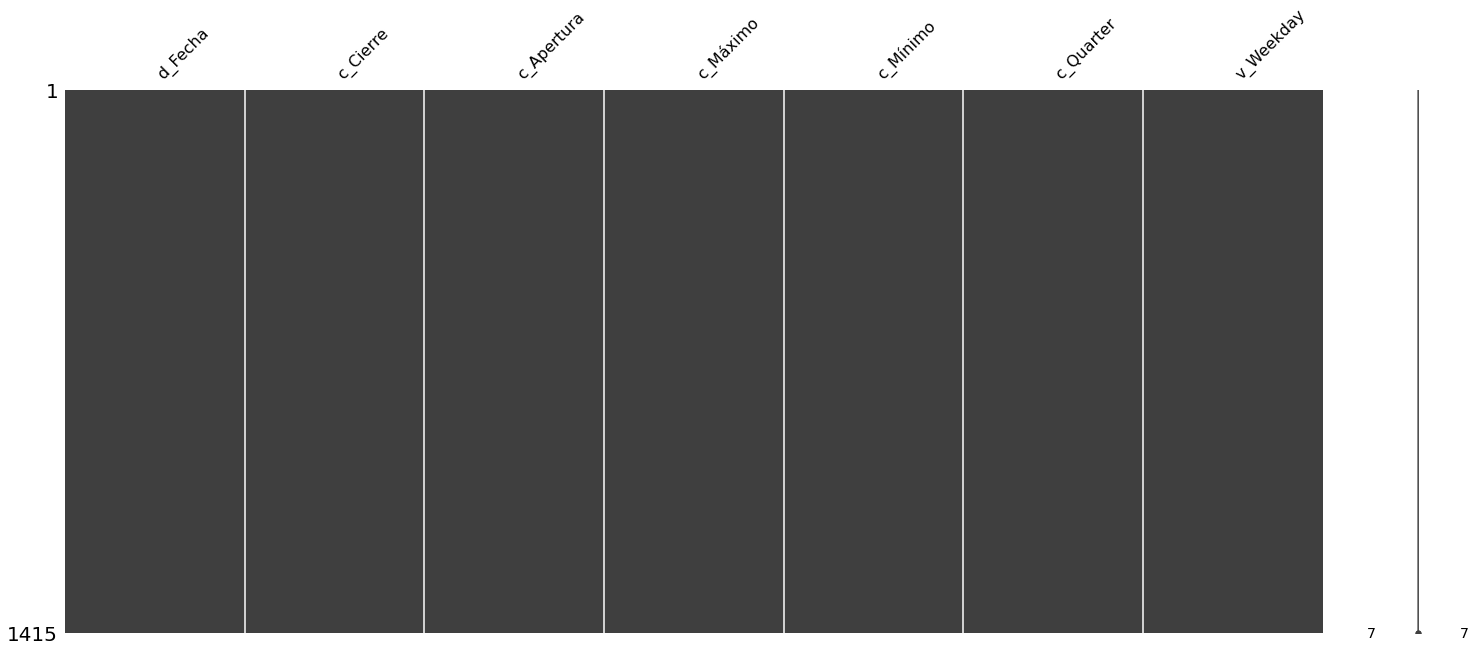

In [184]:
msno.matrix(data)
#no hay nulos

In [185]:
data['d_Fecha'] = pd.to_datetime(data['d_Fecha'])

In [186]:
data["v_Weekday"]=data["v_Weekday"].map(lambda x:clean_text(x, pattern="[^a-zA-Z ]"))

In [187]:
data

,d_Fecha,c_Cierre,c_Apertura,c_Máximo,c_Mínimo,c_Quarter,v_Weekday
0,2012-01-06,27.72,28.89,29.15,27.39,1,friday
1,2012-01-08,20.88,21.50,21.58,20.84,1,sunday
2,2012-01-10,21.99,22.08,22.59,21.73,1,tuesday
3,2012-01-11,21.21,21.08,21.44,21.01,1,wednesday
4,2012-02-07,30.77,31.25,31.73,30.55,1,tuesday
...,...,...,...,...,...,...,...
1410,2017-12-22,177.20,177.14,177.53,176.23,4,friday
1411,2017-12-26,175.99,176.63,177.00,174.67,4,tuesday
1412,2017-12-27,177.62,176.55,178.44,176.26,4,wednesday
1413,2017-12-28,177.92,177.95,178.94,177.68,4,thursday


In [188]:
data.isnull().sum(axis=0)

d_Fecha       0
c_Cierre      0
c_Apertura    0
c_Máximo      0
c_Mínimo      0
c_Quarter     0
v_Weekday     0
dtype: int64

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415 entries, 0 to 1414
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   d_Fecha     1415 non-null   datetime64[ns]
 1   c_Cierre    1415 non-null   float64       
 2   c_Apertura  1415 non-null   float64       
 3   c_Máximo    1415 non-null   float64       
 4   c_Mínimo    1415 non-null   float64       
 5   c_Quarter   1415 non-null   int64         
 6   v_Weekday   1415 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 77.5+ KB


In [190]:
data["v_Weekday"].value_counts(1)

friday       0.185159
wednesday    0.182332
tuesday      0.180919
thursday     0.176678
monday       0.168905
sunday       0.055124
saturday     0.050883
Name: v_Weekday, dtype: float64

In [191]:
data["c_Quarter"].value_counts(1)

3    0.267845
4    0.262191
2    0.247350
1    0.222615
Name: c_Quarter, dtype: float64

In [192]:
data[data["c_Máximo"].map(lambda x:x<0)]

,d_Fecha,c_Cierre,c_Apertura,c_Máximo,c_Mínimo,c_Quarter,v_Weekday


In [193]:
data[data["c_Mínimo"].map(lambda x:x<0)]

,d_Fecha,c_Cierre,c_Apertura,c_Máximo,c_Mínimo,c_Quarter,v_Weekday


In [194]:
data["d_Fecha"].describe(percentiles=np.arange(0.1,1.1,.1))

count                    1415
unique                   1415
top       2012-01-06 00:00:00
freq                        1
first     2012-01-06 00:00:00
last      2017-12-29 00:00:00
Name: d_Fecha, dtype: object

In [195]:
data

,d_Fecha,c_Cierre,c_Apertura,c_Máximo,c_Mínimo,c_Quarter,v_Weekday
0,2012-01-06,27.72,28.89,29.15,27.39,1,friday
1,2012-01-08,20.88,21.50,21.58,20.84,1,sunday
2,2012-01-10,21.99,22.08,22.59,21.73,1,tuesday
3,2012-01-11,21.21,21.08,21.44,21.01,1,wednesday
4,2012-02-07,30.77,31.25,31.73,30.55,1,tuesday
...,...,...,...,...,...,...,...
1410,2017-12-22,177.20,177.14,177.53,176.23,4,friday
1411,2017-12-26,175.99,176.63,177.00,174.67,4,tuesday
1412,2017-12-27,177.62,176.55,178.44,176.26,4,wednesday
1413,2017-12-28,177.92,177.95,178.94,177.68,4,thursday


In [196]:
data["d_Fecha"]

0      2012-01-06
1      2012-01-08
2      2012-01-10
3      2012-01-11
4      2012-02-07
          ...    
1410   2017-12-22
1411   2017-12-26
1412   2017-12-27
1413   2017-12-28
1414   2017-12-29
Name: d_Fecha, Length: 1415, dtype: datetime64[ns]

In [197]:
data=data.sort_values('d_Fecha')


In [198]:
data

,d_Fecha,c_Cierre,c_Apertura,c_Máximo,c_Mínimo,c_Quarter,v_Weekday
0,2012-01-06,27.72,28.89,29.15,27.39,1,friday
1,2012-01-08,20.88,21.50,21.58,20.84,1,sunday
2,2012-01-10,21.99,22.08,22.59,21.73,1,tuesday
3,2012-01-11,21.21,21.08,21.44,21.01,1,wednesday
4,2012-02-07,30.77,31.25,31.73,30.55,1,tuesday
...,...,...,...,...,...,...,...
1410,2017-12-22,177.20,177.14,177.53,176.23,4,friday
1411,2017-12-26,175.99,176.63,177.00,174.67,4,tuesday
1412,2017-12-27,177.62,176.55,178.44,176.26,4,wednesday
1413,2017-12-28,177.92,177.95,178.94,177.68,4,thursday


In [199]:
data["d_Fecha"].diff().describe()

count                         1414
mean     1 days 13:04:09.504950495
std      1 days 12:55:29.324150640
min                1 days 00:00:00
25%                1 days 00:00:00
50%                1 days 00:00:00
75%                2 days 00:00:00
max               27 days 00:00:00
Name: d_Fecha, dtype: object

In [200]:
data["d_Fecha"].value_counts(1)

2012-01-06    0.000707
2015-11-23    0.000707
2016-02-27    0.000707
2016-02-26    0.000707
2016-02-25    0.000707
                ...   
2014-04-03    0.000707
2014-04-02    0.000707
2014-03-31    0.000707
2014-03-28    0.000707
2017-12-29    0.000707
Name: d_Fecha, Length: 1415, dtype: float64

## Ingeneria de variables

In [201]:
import datetime

In [202]:
datac=data.copy()

In [203]:
data.shape

(1415, 7)

In [204]:
datac.shape

(1415, 7)

In [205]:
datac=datac.set_index("d_Fecha")

In [206]:
datac= datac.resample("W").mean()

In [207]:
datac

,c_Cierre,c_Apertura,c_Máximo,c_Mínimo,c_Quarter
d_Fecha,,,,,
2012-01-08,24.300000,25.195000,25.365000,24.1150,1.0
2012-01-15,21.600000,21.580000,22.015000,21.3700,1.0
2012-01-22,NaN,NaN,NaN,NaN,NaN
2012-01-29,NaN,NaN,NaN,NaN,NaN
2012-02-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-12-03,168.876000,170.084000,170.992000,167.6160,4.0
2017-12-10,157.126667,156.858333,157.843333,155.6450,4.0
2017-12-17,178.457500,178.302500,179.797500,177.4725,4.0


In [208]:
datac.shape

(313, 5)

In [209]:
datac=datac.dropna()

In [210]:
datac.shape

(303, 5)

In [211]:
datac

,c_Cierre,c_Apertura,c_Máximo,c_Mínimo,c_Quarter
d_Fecha,,,,,
2012-01-08,24.300000,25.195000,25.365000,24.115000,1.0
2012-01-15,21.600000,21.580000,22.015000,21.370000,1.0
2012-02-12,23.565000,23.840000,24.187500,23.315000,1.0
2012-03-11,24.706667,24.523333,25.363333,24.166667,1.0
2012-03-18,27.040000,28.000000,28.880000,26.980000,1.0
...,...,...,...,...,...
2017-12-03,168.876000,170.084000,170.992000,167.616000,4.0
2017-12-10,157.126667,156.858333,157.843333,155.645000,4.0
2017-12-17,178.457500,178.302500,179.797500,177.472500,4.0


In [212]:
datac["c_Cierre"].shift(1)

d_Fecha
2012-01-08           NaN
2012-01-15     24.300000
2012-02-12     21.600000
2012-03-11     23.565000
2012-03-18     24.706667
                 ...    
2017-12-03    181.062500
2017-12-10    168.876000
2017-12-17    157.126667
2017-12-24    178.457500
2017-12-31    178.574000
Name: c_Cierre, Length: 303, dtype: float64

In [213]:
datac['c_Cierre'].head()

d_Fecha
2012-01-08    24.300000
2012-01-15    21.600000
2012-02-12    23.565000
2012-03-11    24.706667
2012-03-18    27.040000
Name: c_Cierre, dtype: float64

In [214]:
datac['c_Cierre'][:3].mean()

23.155

In [215]:
datac['c_Cierre'][1:4].mean()

23.290555555555557

In [216]:
datac["c_Cierre"].rolling(3).mean()

d_Fecha
2012-01-08           NaN
2012-01-15           NaN
2012-02-12     23.155000
2012-03-11     23.290556
2012-03-18     25.103889
                 ...    
2017-12-03    176.204833
2017-12-10    169.021722
2017-12-17    168.153389
2017-12-24    171.386056
2017-12-31    178.009667
Name: c_Cierre, Length: 303, dtype: float64

In [217]:
datac

,c_Cierre,c_Apertura,c_Máximo,c_Mínimo,c_Quarter
d_Fecha,,,,,
2012-01-08,24.300000,25.195000,25.365000,24.115000,1.0
2012-01-15,21.600000,21.580000,22.015000,21.370000,1.0
2012-02-12,23.565000,23.840000,24.187500,23.315000,1.0
2012-03-11,24.706667,24.523333,25.363333,24.166667,1.0
2012-03-18,27.040000,28.000000,28.880000,26.980000,1.0
...,...,...,...,...,...
2017-12-03,168.876000,170.084000,170.992000,167.616000,4.0
2017-12-10,157.126667,156.858333,157.843333,155.645000,4.0
2017-12-17,178.457500,178.302500,179.797500,177.472500,4.0


In [218]:
datac

,c_Cierre,c_Apertura,c_Máximo,c_Mínimo,c_Quarter
d_Fecha,,,,,
2012-01-08,24.300000,25.195000,25.365000,24.115000,1.0
2012-01-15,21.600000,21.580000,22.015000,21.370000,1.0
2012-02-12,23.565000,23.840000,24.187500,23.315000,1.0
2012-03-11,24.706667,24.523333,25.363333,24.166667,1.0
2012-03-18,27.040000,28.000000,28.880000,26.980000,1.0
...,...,...,...,...,...
2017-12-03,168.876000,170.084000,170.992000,167.616000,4.0
2017-12-10,157.126667,156.858333,157.843333,155.645000,4.0
2017-12-17,178.457500,178.302500,179.797500,177.472500,4.0


In [219]:
datac["c_Cierre"].diff(1)

d_Fecha
2012-01-08          NaN
2012-01-15    -2.700000
2012-02-12     1.965000
2012-03-11     1.141667
2012-03-18     2.333333
                ...    
2017-12-03   -12.186500
2017-12-10   -11.749333
2017-12-17    21.330833
2017-12-24     0.116500
2017-12-31    -1.576500
Name: c_Cierre, Length: 303, dtype: float64

In [220]:
variables=(datac.filter(like="c_").columns)

In [221]:
datac

,c_Cierre,c_Apertura,c_Máximo,c_Mínimo,c_Quarter
d_Fecha,,,,,
2012-01-08,24.300000,25.195000,25.365000,24.115000,1.0
2012-01-15,21.600000,21.580000,22.015000,21.370000,1.0
2012-02-12,23.565000,23.840000,24.187500,23.315000,1.0
2012-03-11,24.706667,24.523333,25.363333,24.166667,1.0
2012-03-18,27.040000,28.000000,28.880000,26.980000,1.0
...,...,...,...,...,...
2017-12-03,168.876000,170.084000,170.992000,167.616000,4.0
2017-12-10,157.126667,156.858333,157.843333,155.645000,4.0
2017-12-17,178.457500,178.302500,179.797500,177.472500,4.0


In [222]:
for col in variables:
    for i in range(2):
        datac[f"{col}_diff_{i+1}"] = datac[f"{col}"].diff(i+1)
        datac[f"{col}_ma_{i+1}"] = datac[f"{col}"].rolling(i+2).mean()
        datac[f"{col}_ma_std_{i+1}"] = datac[f"{col}"].rolling(i+2).std()
        datac[f"{col}_t-{i+1}"] = datac[f"{col}"].shift(i+1)
        datac[f"{col}_pct_{i+1}"] = datac[f"{col}"].pct_change(i+1)

In [223]:
diff=list(filter(lambda x:"diff_" in x, datac.columns))
ma=list(filter(lambda x:"ma_" in x, datac.columns))
t=list(filter(lambda x:"t-" in x, datac.columns))
pct=list(filter(lambda x:"pct_" in x, datac.columns))

In [224]:
datac

,c_Cierre,c_Apertura,c_Máximo,c_Mínimo,c_Quarter,c_Cierre_diff_1,c_Cierre_ma_1,c_Cierre_ma_std_1,c_Cierre_t-1,c_Cierre_pct_1,...,c_Quarter_diff_1,c_Quarter_ma_1,c_Quarter_ma_std_1,c_Quarter_t-1,c_Quarter_pct_1,c_Quarter_diff_2,c_Quarter_ma_2,c_Quarter_ma_std_2,c_Quarter_t-2,c_Quarter_pct_2
d_Fecha,,,,,,,,,,,,,,,,,,,,,
2012-01-08,24.300000,25.195000,25.365000,24.115000,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-15,21.600000,21.580000,22.015000,21.370000,1.0,-2.700000,22.950000,1.909188,24.300000,-0.111111,...,0.0,1.0,0.000000e+00,1.0,0.0,NaN,NaN,NaN,NaN,NaN
2012-02-12,23.565000,23.840000,24.187500,23.315000,1.0,1.965000,22.582500,1.389465,21.600000,0.090972,...,0.0,1.0,0.000000e+00,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2012-03-11,24.706667,24.523333,25.363333,24.166667,1.0,1.141667,24.135833,0.807280,23.565000,0.048448,...,0.0,1.0,0.000000e+00,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2012-03-18,27.040000,28.000000,28.880000,26.980000,1.0,2.333333,25.873333,1.649916,24.706667,0.094441,...,0.0,1.0,0.000000e+00,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-03,168.876000,170.084000,170.992000,167.616000,4.0,-12.186500,174.969250,8.617157,181.062500,-0.067305,...,0.0,4.0,3.650024e-08,4.0,0.0,0.0,4.0,0.0,4.0,0.0
2017-12-10,157.126667,156.858333,157.843333,155.645000,4.0,-11.749333,163.001333,8.308033,168.876000,-0.069574,...,0.0,4.0,3.650024e-08,4.0,0.0,0.0,4.0,0.0,4.0,0.0
2017-12-17,178.457500,178.302500,179.797500,177.472500,4.0,21.330833,167.792083,15.083177,157.126667,0.135756,...,0.0,4.0,3.650024e-08,4.0,0.0,0.0,4.0,0.0,4.0,0.0


In [225]:
datac.isnull().sum()

c_Cierre               0
c_Apertura             0
c_Máximo               0
c_Mínimo               0
c_Quarter              0
c_Cierre_diff_1        1
c_Cierre_ma_1          1
c_Cierre_ma_std_1      1
c_Cierre_t-1           1
c_Cierre_pct_1         1
c_Cierre_diff_2        2
c_Cierre_ma_2          2
c_Cierre_ma_std_2      2
c_Cierre_t-2           2
c_Cierre_pct_2         2
c_Apertura_diff_1      1
c_Apertura_ma_1        1
c_Apertura_ma_std_1    1
c_Apertura_t-1         1
c_Apertura_pct_1       1
c_Apertura_diff_2      2
c_Apertura_ma_2        2
c_Apertura_ma_std_2    2
c_Apertura_t-2         2
c_Apertura_pct_2       2
c_Máximo_diff_1        1
c_Máximo_ma_1          1
c_Máximo_ma_std_1      1
c_Máximo_t-1           1
c_Máximo_pct_1         1
c_Máximo_diff_2        2
c_Máximo_ma_2          2
c_Máximo_ma_std_2      2
c_Máximo_t-2           2
c_Máximo_pct_2         2
c_Mínimo_diff_1        1
c_Mínimo_ma_1          1
c_Mínimo_ma_std_1      1
c_Mínimo_t-1           1
c_Mínimo_pct_1         1


In [226]:
datac=datac.dropna()

In [227]:
datac

,c_Cierre,c_Apertura,c_Máximo,c_Mínimo,c_Quarter,c_Cierre_diff_1,c_Cierre_ma_1,c_Cierre_ma_std_1,c_Cierre_t-1,c_Cierre_pct_1,...,c_Quarter_diff_1,c_Quarter_ma_1,c_Quarter_ma_std_1,c_Quarter_t-1,c_Quarter_pct_1,c_Quarter_diff_2,c_Quarter_ma_2,c_Quarter_ma_std_2,c_Quarter_t-2,c_Quarter_pct_2
d_Fecha,,,,,,,,,,,,,,,,,,,,,
2012-02-12,23.565000,23.840000,24.187500,23.315000,1.0,1.965000,22.582500,1.389465,21.600000,0.090972,...,0.0,1.0,0.000000e+00,1.0,0.0,0.0,1.000000,0.00000,1.0,0.0
2012-03-11,24.706667,24.523333,25.363333,24.166667,1.0,1.141667,24.135833,0.807280,23.565000,0.048448,...,0.0,1.0,0.000000e+00,1.0,0.0,0.0,1.000000,0.00000,1.0,0.0
2012-03-18,27.040000,28.000000,28.880000,26.980000,1.0,2.333333,25.873333,1.649916,24.706667,0.094441,...,0.0,1.0,0.000000e+00,1.0,0.0,0.0,1.000000,0.00000,1.0,0.0
2012-04-08,26.900000,27.200000,27.650000,26.440000,2.0,-0.140000,26.970000,0.098995,27.040000,-0.005178,...,1.0,1.5,7.071068e-01,1.0,1.0,1.0,1.333333,0.57735,1.0,1.0
2012-04-15,22.380000,22.486667,22.810000,21.880000,2.0,-4.520000,24.640000,3.196123,26.900000,-0.168030,...,0.0,2.0,0.000000e+00,2.0,0.0,1.0,1.666667,0.57735,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-03,168.876000,170.084000,170.992000,167.616000,4.0,-12.186500,174.969250,8.617157,181.062500,-0.067305,...,0.0,4.0,3.650024e-08,4.0,0.0,0.0,4.000000,0.00000,4.0,0.0
2017-12-10,157.126667,156.858333,157.843333,155.645000,4.0,-11.749333,163.001333,8.308033,168.876000,-0.069574,...,0.0,4.0,3.650024e-08,4.0,0.0,0.0,4.000000,0.00000,4.0,0.0
2017-12-17,178.457500,178.302500,179.797500,177.472500,4.0,21.330833,167.792083,15.083177,157.126667,0.135756,...,0.0,4.0,3.650024e-08,4.0,0.0,0.0,4.000000,0.00000,4.0,0.0


In [228]:
datac["c_Cierre"].shift(-1)


d_Fecha
2012-02-12     24.706667
2012-03-11     27.040000
2012-03-18     26.900000
2012-04-08     22.380000
2012-04-15     25.870000
                 ...    
2017-12-03    157.126667
2017-12-10    178.457500
2017-12-17    178.574000
2017-12-24    176.997500
2017-12-31           NaN
Name: c_Cierre, Length: 301, dtype: float64

In [233]:
datac["c_Cierre"]=datac["c_Cierre"].shift(-1)

In [234]:
datac

,c_Cierre,c_Apertura,c_Máximo,c_Mínimo,c_Quarter,c_Cierre_diff_1,c_Cierre_ma_1,c_Cierre_ma_std_1,c_Cierre_t-1,c_Cierre_pct_1,...,c_Quarter_diff_1,c_Quarter_ma_1,c_Quarter_ma_std_1,c_Quarter_t-1,c_Quarter_pct_1,c_Quarter_diff_2,c_Quarter_ma_2,c_Quarter_ma_std_2,c_Quarter_t-2,c_Quarter_pct_2
d_Fecha,,,,,,,,,,,,,,,,,,,,,
2012-02-12,24.706667,23.840000,24.187500,23.315000,1.0,1.965000,22.582500,1.389465,21.600000,0.090972,...,0.0,1.0,0.000000e+00,1.0,0.0,0.0,1.000000,0.00000,1.0,0.0
2012-03-11,27.040000,24.523333,25.363333,24.166667,1.0,1.141667,24.135833,0.807280,23.565000,0.048448,...,0.0,1.0,0.000000e+00,1.0,0.0,0.0,1.000000,0.00000,1.0,0.0
2012-03-18,26.900000,28.000000,28.880000,26.980000,1.0,2.333333,25.873333,1.649916,24.706667,0.094441,...,0.0,1.0,0.000000e+00,1.0,0.0,0.0,1.000000,0.00000,1.0,0.0
2012-04-08,22.380000,27.200000,27.650000,26.440000,2.0,-0.140000,26.970000,0.098995,27.040000,-0.005178,...,1.0,1.5,7.071068e-01,1.0,1.0,1.0,1.333333,0.57735,1.0,1.0
2012-04-15,25.870000,22.486667,22.810000,21.880000,2.0,-4.520000,24.640000,3.196123,26.900000,-0.168030,...,0.0,2.0,0.000000e+00,2.0,0.0,1.0,1.666667,0.57735,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-03,157.126667,170.084000,170.992000,167.616000,4.0,-12.186500,174.969250,8.617157,181.062500,-0.067305,...,0.0,4.0,3.650024e-08,4.0,0.0,0.0,4.000000,0.00000,4.0,0.0
2017-12-10,178.457500,156.858333,157.843333,155.645000,4.0,-11.749333,163.001333,8.308033,168.876000,-0.069574,...,0.0,4.0,3.650024e-08,4.0,0.0,0.0,4.000000,0.00000,4.0,0.0
2017-12-17,178.574000,178.302500,179.797500,177.472500,4.0,21.330833,167.792083,15.083177,157.126667,0.135756,...,0.0,4.0,3.650024e-08,4.0,0.0,0.0,4.000000,0.00000,4.0,0.0


In [235]:
datac.isnull().sum()

c_Cierre               1
c_Apertura             0
c_Máximo               0
c_Mínimo               0
c_Quarter              0
c_Cierre_diff_1        0
c_Cierre_ma_1          0
c_Cierre_ma_std_1      0
c_Cierre_t-1           0
c_Cierre_pct_1         0
c_Cierre_diff_2        0
c_Cierre_ma_2          0
c_Cierre_ma_std_2      0
c_Cierre_t-2           0
c_Cierre_pct_2         0
c_Apertura_diff_1      0
c_Apertura_ma_1        0
c_Apertura_ma_std_1    0
c_Apertura_t-1         0
c_Apertura_pct_1       0
c_Apertura_diff_2      0
c_Apertura_ma_2        0
c_Apertura_ma_std_2    0
c_Apertura_t-2         0
c_Apertura_pct_2       0
c_Máximo_diff_1        0
c_Máximo_ma_1          0
c_Máximo_ma_std_1      0
c_Máximo_t-1           0
c_Máximo_pct_1         0
c_Máximo_diff_2        0
c_Máximo_ma_2          0
c_Máximo_ma_std_2      0
c_Máximo_t-2           0
c_Máximo_pct_2         0
c_Mínimo_diff_1        0
c_Mínimo_ma_1          0
c_Mínimo_ma_std_1      0
c_Mínimo_t-1           0
c_Mínimo_pct_1         0


In [238]:
df_facebook=datac.dropna()

In [239]:
df_facebook

,c_Cierre,c_Apertura,c_Máximo,c_Mínimo,c_Quarter,c_Cierre_diff_1,c_Cierre_ma_1,c_Cierre_ma_std_1,c_Cierre_t-1,c_Cierre_pct_1,...,c_Quarter_diff_1,c_Quarter_ma_1,c_Quarter_ma_std_1,c_Quarter_t-1,c_Quarter_pct_1,c_Quarter_diff_2,c_Quarter_ma_2,c_Quarter_ma_std_2,c_Quarter_t-2,c_Quarter_pct_2
d_Fecha,,,,,,,,,,,,,,,,,,,,,
2012-02-12,24.706667,23.840000,24.187500,23.315000,1.0,1.965000,22.582500,1.389465,21.600000,0.090972,...,0.0,1.0,0.000000e+00,1.0,0.0,0.0,1.000000,0.00000,1.0,0.0
2012-03-11,27.040000,24.523333,25.363333,24.166667,1.0,1.141667,24.135833,0.807280,23.565000,0.048448,...,0.0,1.0,0.000000e+00,1.0,0.0,0.0,1.000000,0.00000,1.0,0.0
2012-03-18,26.900000,28.000000,28.880000,26.980000,1.0,2.333333,25.873333,1.649916,24.706667,0.094441,...,0.0,1.0,0.000000e+00,1.0,0.0,0.0,1.000000,0.00000,1.0,0.0
2012-04-08,22.380000,27.200000,27.650000,26.440000,2.0,-0.140000,26.970000,0.098995,27.040000,-0.005178,...,1.0,1.5,7.071068e-01,1.0,1.0,1.0,1.333333,0.57735,1.0,1.0
2012-04-15,25.870000,22.486667,22.810000,21.880000,2.0,-4.520000,24.640000,3.196123,26.900000,-0.168030,...,0.0,2.0,0.000000e+00,2.0,0.0,1.0,1.666667,0.57735,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,168.876000,179.930000,181.567500,179.455000,4.0,2.386500,179.869250,1.687510,178.676000,0.013357,...,0.0,4.0,3.650024e-08,4.0,0.0,0.0,4.000000,0.00000,4.0,0.0
2017-12-03,157.126667,170.084000,170.992000,167.616000,4.0,-12.186500,174.969250,8.617157,181.062500,-0.067305,...,0.0,4.0,3.650024e-08,4.0,0.0,0.0,4.000000,0.00000,4.0,0.0
2017-12-10,178.457500,156.858333,157.843333,155.645000,4.0,-11.749333,163.001333,8.308033,168.876000,-0.069574,...,0.0,4.0,3.650024e-08,4.0,0.0,0.0,4.000000,0.00000,4.0,0.0
